**KERNEL FOR DATA EXPLORATION**

This kernel uses the following features of the train set to get some insights into the data. The model will be trained considering them too. Just testing out whether that gives an increased performance or not.
The features are:
* severe_toxicity
* obscene
* threat
* insult
* identity_attack
* sexual_explicit

The comments are stored in train and test in **comment_text** column.
Additionally, in train we have flags for the presence in the comments of a certain sensitive topic. The topic is related to five categories: **race or ethnicity, gender, sexual orientation, religion, disability,** as following:

* **race or ethnicity**: asian, black, jewish, latino, other_race_or_ethnicity, white
* **gender**: female, male, transgender, other_gender
* **sexual orientation: bisexual, heterosexual, homosexual_gay_or_lesbian, other_sexual_orientation
* **religion**: atheist,buddhist, christian, hindu, muslim, other_religion
* **disability**: intellectual_or_learning_disability, other_disability, physical_disability, psychiatric_or_mental_illness
We also have few article/comment identification information:

* created_date
* publication_id
* parent_id
* article_id

Several user feedback information associated with the comments are provided:

* rating
* funny
* wow
* sad
* likes
* disagree
* sexual_explicit

In the datasets are also 2 fields relative to annotations:

* identity_annotator_count
* toxicity_annotator_count

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # For plotting some graphs
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
DATASET_DIRECTORY = "../input/jigsaw-unintended-bias-in-toxicity-classification/"
EMBEDDING_DIRECTORY = "../input/glove840b300dtxt/"

MAX_LEN = 220
EMBEDDING_DIMS = 300
LSTM_UNITS = 128
DENSE_HIDDEN_UNITS = 4 * LSTM_UNITS


['glove840b300dtxt', 'jigsaw-unintended-bias-in-toxicity-classification']


In [2]:
df_train = pd.read_csv(DATASET_DIRECTORY + 'train.csv')
print(df_train.head())
df_test = pd.read_csv(DATASET_DIRECTORY + 'test.csv')
print(df_test.head())

      id            ...             toxicity_annotator_count
0  59848            ...                                    4
1  59849            ...                                    4
2  59852            ...                                    4
3  59855            ...                                    4
4  59856            ...                                   47

[5 rows x 45 columns]
        id                                       comment_text
0  7000000  Jeff Sessions is another one of Trump's Orwell...
1  7000001  I actually inspected the infrastructure on Gra...
2  7000002  No it won't . That's just wishful thinking on ...
3  7000003  Instead of wringing our hands and nibbling the...
4  7000004  how many of you commenters have garbage piled ...


Use pandas 'describe()' to get some insights

In [3]:
print(f'Target:\n{df_train["target"].describe()}')
print(f'Severe Toxicity:\n{df_train["severe_toxicity"].describe()}')
print(f'Obscene:\n{df_train["obscene"].describe()}')
print(f'Threat:\n{df_train["threat"].describe()}')
print(f'Insult:\n{df_train["insult"].describe()}')
print(f'Identity Attack:\n{df_train["identity_attack"].describe()}')
print(f'Sexual Explicit:\n{df_train["sexual_explicit"].describe()}')

Target:
count    1.804874e+06
mean     1.030173e-01
std      1.970757e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.666667e-01
max      1.000000e+00
Name: target, dtype: float64
Severe Toxicity:
count    1.804874e+06
mean     4.582099e-03
std      2.286128e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: severe_toxicity, dtype: float64
Obscene:
count    1.804874e+06
mean     1.387721e-02
std      6.460419e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: obscene, dtype: float64
Threat:
count    1.804874e+06
mean     9.311271e-03
std      4.942218e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: threat, dtype: float64
Insult:
count    1.804874e+06
mean     8.115273e-02
std      1.760657e-01
min      0.000000e+00
25%      0.000000e+00
50%      0

Visualize the distribution of targets.
It is clear that there are way **more number of non-toxic** samples rather than toxic ones

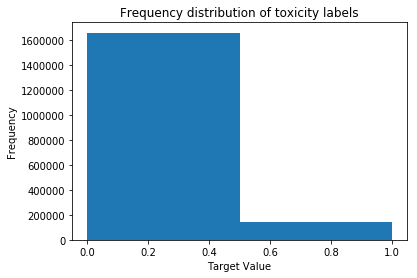

In [4]:
n, bins, patches = plt.hist(df_train['target'], bins=2)
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.title('Frequency distribution of toxicity labels')
plt.show()

In [5]:
def plot_features_distribution(features, title):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        sns.distplot(df_train[feature],kde=True,hist=False, bins=20, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


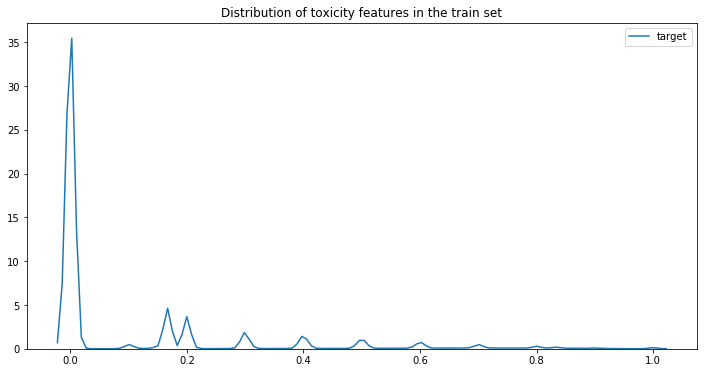

In [6]:
plot_features_distribution(['target'], "Distribution of toxicity features in the train set")

**Check Distribution of Target features**


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


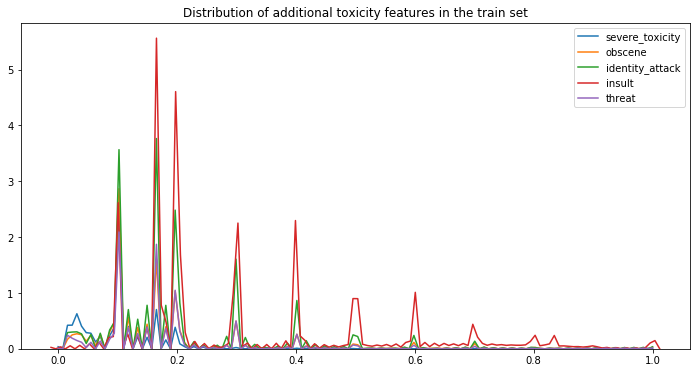

In [7]:
features = ['severe_toxicity', 'obscene','identity_attack','insult','threat']
plot_features_distribution(features, "Distribution of additional toxicity features in the train set")

**Racial features**

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


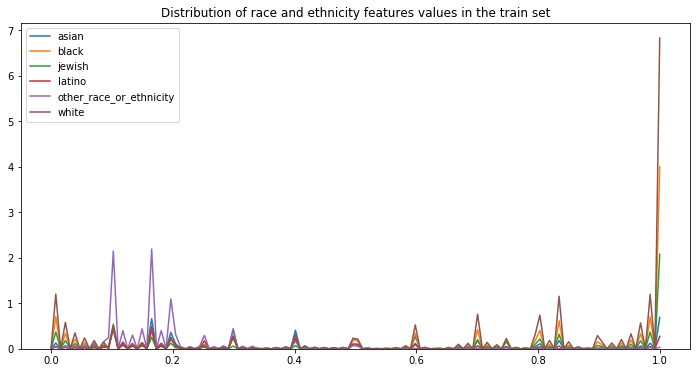

In [8]:
features = ['asian', 'black', 'jewish', 'latino', 'other_race_or_ethnicity', 'white']
plot_features_distribution(features, "Distribution of race and ethnicity features values in the train set")

**Related to gender**

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


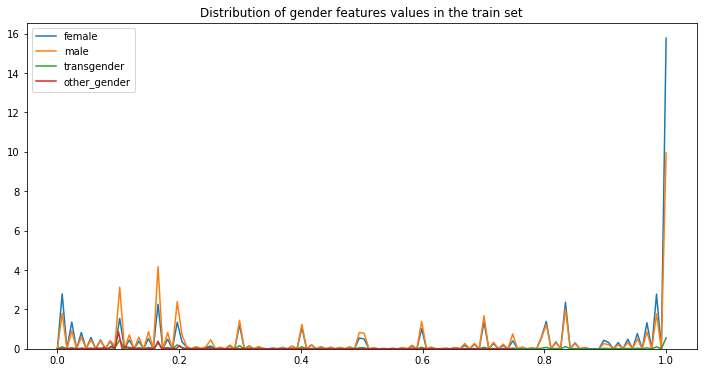

In [9]:
features = ['female', 'male', 'transgender', 'other_gender']
plot_features_distribution(features, "Distribution of gender features values in the train set")

**Sexual Orientation**

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


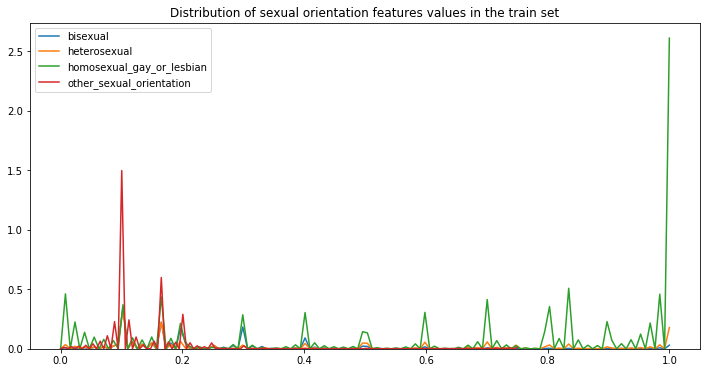

In [10]:
features = ['bisexual', 'heterosexual', 'homosexual_gay_or_lesbian', 'other_sexual_orientation']
plot_features_distribution(features, "Distribution of sexual orientation features values in the train set")

**Religious Features**

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


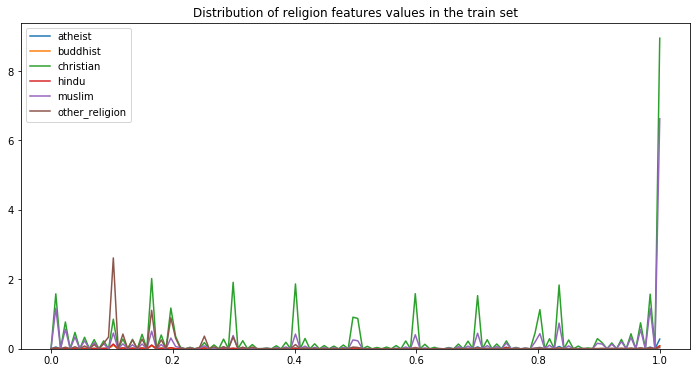

In [11]:
features = ['atheist','buddhist',  'christian', 'hindu', 'muslim', 'other_religion']
plot_features_distribution(features, "Distribution of religion features values in the train set")

**Disabilty Features**

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


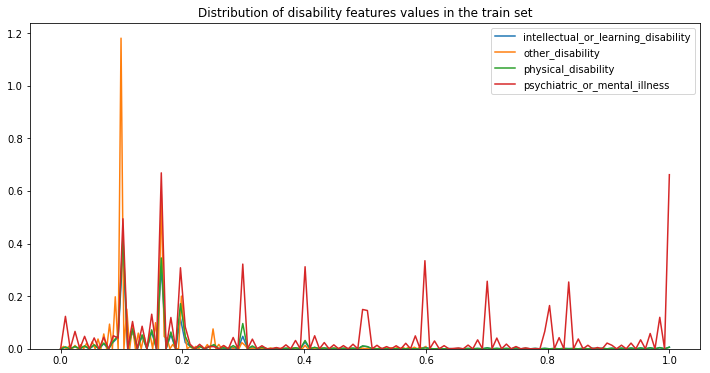

In [12]:
features = ['intellectual_or_learning_disability', 'other_disability', 'physical_disability', 'psychiatric_or_mental_illness']
plot_features_distribution(features, "Distribution of disability features values in the train set")

Function to clean and preprocess the data

In [13]:
def preprocess(data):
    '''
    Credit goes to https://www.kaggle.com/gpreda/jigsaw-fast-compact-solution
    '''
    punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~`" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
    def clean_special_chars(text, punct):
        for p in punct:
            text = text.replace(p, ' ')
        return text

    data = data.astype(str).apply(lambda x: clean_special_chars(x, punct))
    return data

In [33]:
x_train = preprocess(df_train['comment_text'])
x_test = preprocess(df_test['comment_text'])

**Data after preprocessing**

In [15]:
print(x_train.head())

0    This is so cool  It s like   would you want yo...
1    Thank you   This would make my life a lot less...
2    This is such an urgent design problem  kudos t...
3    Is this something I ll be able to install on m...
4                 haha you guys are a bunch of losers 
Name: comment_text, dtype: object


**Get the labels and helper labels**

In [50]:
y_train = np.where(df_train['target'] >= 0.5, 1, 0)
y_train_helper = df_train[['severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat']]

**Tokenize the sequences**

In [35]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(x_train) + list(x_test))

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen=MAX_LEN)
x_test = pad_sequences(x_test, maxlen=MAX_LEN)

**Get the embedding matrix**

In [36]:
def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')


def load_embeddings(path):
    with open(path) as f:
        return dict(get_coefs(*line.strip().split(' ')) for line in f)


def build_matrix(word_index, path):
    embedding_index = load_embeddings(path)
    embedding_matrix = np.zeros((len(word_index) + 1, 300))
    for word, i in word_index.items():
        try:
            embedding_matrix[i] = embedding_index[word]
        except KeyError:
            pass
    return embedding_matrix

embedding_matrix = build_matrix(tokenizer.word_index, EMBEDDING_DIRECTORY + os.listdir(EMBEDDING_DIRECTORY)[0])

**Build the model**

In [52]:
from keras.models import Model
from keras.layers import Input, Dense, Embedding, SpatialDropout1D, Dropout, add, concatenate
from keras.layers import CuDNNLSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.preprocessing import text, sequence

def build_model(embedding_matrix, num_helper_targets):
    words = Input(shape=(MAX_LEN,))
    x = Embedding(input_dim=embedding_matrix.shape[0],
                 output_dim=embedding_matrix.shape[1],
                 input_length=MAX_LEN,
                 weights=[embedding_matrix],
                 trainable=True)(words)
    x = SpatialDropout1D(rate = 0.5)(x)
    x = Bidirectional(CuDNNLSTM(LSTM_UNITS, return_sequences=True))(x)
    x = Bidirectional(CuDNNLSTM(LSTM_UNITS, return_sequences=True))(x)
    
    hidden = concatenate([
        GlobalMaxPooling1D()(x),
        GlobalAveragePooling1D()(x)
    ])
    hidden = add([hidden, Dense(DENSE_HIDDEN_UNITS, activation='relu')(hidden)])
    hidden = add([hidden, Dense(DENSE_HIDDEN_UNITS, activation='relu')(hidden)])
    result = Dense(1, activation='sigmoid')(hidden)
    helper_result = Dense(num_helper_targets, activation='sigmoid')(hidden)
    
    model = Model(input=words, outputs=[result, helper_result])
    model.compile(loss='binary_crossentropy', optimizer='adam')
    
    return model

**Learning Rate adjustment callback**

In [38]:
from keras.callbacks import LearningRateScheduler

callbacks = [LearningRateScheduler(lambda epoch: 1e-3 * (0.6 ** epoch))]

**Here we go. Training and Testing the model now.**
Credits to: https://www.kaggle.com/thousandvoices/simple-lstm

I am going to use their training mechanism to predict classes on each epoch and final result be an avergae of them all.

In [ ]:
model = build_model(embedding_matrix, y_train_helper.shape[1])

checkpoint_predictions = []
prediction_weight = []

for model_id in range(2):
    model = build_model(embedding_matrix, y_train_helper.shape[1])
    for epoch in range(4):
        history = model.fit(x_train,
                        [y_train, y_train_helper],
                        batch_size=1024,
                        epochs=1,
                        verbose=2,
                        callbacks=callbacks)
        checkpoint_predictions.append(model.predict(x_test, batch_size=2048)[0].flatten())
        prediction_weight.append(epoch ** 2)

5


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("in...)`


5


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("in...)`


Epoch 1/1
 - 686s - loss: 0.2215 - dense_31_loss: 0.1378 - dense_32_loss: 0.0837
Epoch 1/1
 - 681s - loss: 0.1940 - dense_31_loss: 0.1164 - dense_32_loss: 0.0775
Epoch 1/1
 - 682s - loss: 0.1855 - dense_31_loss: 0.1089 - dense_32_loss: 0.0766
Epoch 1/1


**Average the predictions.**

In [ ]:
predictions = np.average(checkpoint_predictions, weights=prediction_weight, axis=0)

**Create Dataframe and submit the predictions.**

In [ ]:
submission = pd.DataFrame.from_dict({
    'id': df_test['id'],
    'prediction': predictions
})
submission.to_csv('submission.csv', index=False)